<a href="https://colab.research.google.com/github/ShriKant114/ML-Project/blob/main/2_Multiple_Linear_Regression_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = pd.read_csv("data.csv")
df

,area,room,age,price
0,2600,5.0,15,1000
1,2800,6.0,20,1200
2,3000,5.0,24,1800
3,3100,NaN,26,2000
4,3600,7.0,30,3000


In [ ]:
median_room = math.floor(df.room.median())
median_room

5

In [ ]:
df.room = df.room.fillna(median_room)
df

,area,room,age,price
0,2600,5.0,15,1000
1,2800,6.0,20,1200
2,3000,5.0,24,1800
3,3100,5.0,26,2000
4,3600,7.0,30,3000


In [ ]:
X = df[['area', 'room', 'age']]   # Independent variables
Y = df['price']

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [ ]:
y_pred = reg.predict(X)
y_pred

print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("Prediction for new data [2000 sq ft, 4 rooms, 10 years old]:", reg.predict([[2000, 4, 10]])[0])

Coefficients: [   3.06879778 -173.17581654  -48.22793607]
Intercept: -5388.742182070885
Prediction for new data [2000 sq ft, 4 rooms, 10 years old]: -426.1292564280757


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


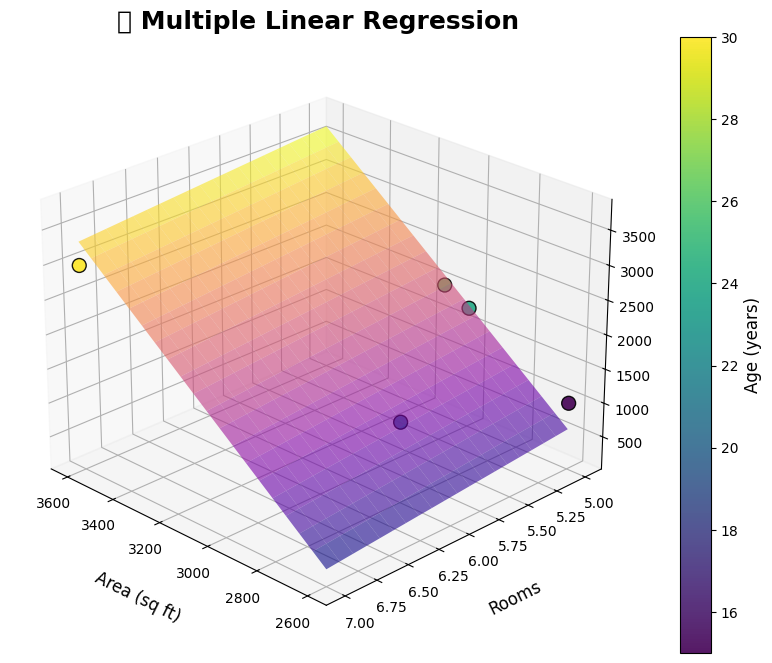

Coefficients: [   3.06879778 -173.17581654  -48.22793607]
Intercept: -5388.742182070885
Prediction for [2000 sq ft, 4 rooms, 10 years old]: -426.1292564280757


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# 🌟 Plot the enhanced 3D graph
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# 🎯 Scatter plot for actual data, displaying all dimensions
sc = ax.scatter(df['area'], df['room'], df['price'], c=df['age'], cmap='viridis', s=100, alpha=0.9, edgecolors='black', label='Actual Data')

# Add color bar to represent "age"
cbar = plt.colorbar(sc)
cbar.set_label('Age (years)', fontsize=12)

# 🔥 Create a mesh grid for the regression plane
area_range = np.linspace(df['area'].min(), df['area'].max(), 20)
room_range = np.linspace(df['room'].min(), df['room'].max(), 20)
area_mesh, room_mesh = np.meshgrid(area_range, room_range)

# Create a regression plane using the average age
age_mean = df['age'].mean()  # Average age for the plane
price_plane = reg.predict(np.c_[area_mesh.ravel(), room_mesh.ravel(), np.full(area_mesh.ravel().shape, age_mean)])
price_plane = price_plane.reshape(area_mesh.shape)

# 🔥 Stylish regression plane with gradient color
ax.plot_surface(area_mesh, room_mesh, price_plane, cmap='plasma', alpha=0.6, edgecolor='none')

# 🎯 Labels and legend
ax.set_xlabel('Area (sq ft)', fontsize=12, labelpad=15)
ax.set_ylabel('Rooms', fontsize=12, labelpad=15)
ax.set_zlabel('Price', fontsize=12, labelpad=15)
ax.set_title('✨ Multiple Linear Regression', fontsize=18, fontweight='bold')

# 🌟 Improve appearance
ax.view_init(elev=25, azim=135)  # Better viewing angle
ax.grid(True)

# Display the graph
plt.show()

# Display coefficients and predictions
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("Prediction for [2000 sq ft, 4 rooms, 10 years old]:", reg.predict([[2000, 4, 10]])[0])